In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Définir la date actuelle pour l'analyse RFM
current_date = datetime.strptime('2018-10-18', '%Y-%m-%d')

# Calculer la récence (nombre de jours depuis la dernière commande)
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'])
customer_data['recency'] = (current_date - customer_data['last_order']).dt.days

# Calculer la fréquence en utilisant la colonne 'connection_days'
customer_data['frequency'] = customer_data['connection_days']

# Calculer la valeur monétaire en utilisant la colonne 'total_spent'
customer_data['monetary'] = customer_data['total_spent']

# S'assurer que les colonnes sont de type numérique
customer_data['recency'] = pd.to_numeric(customer_data['recency'], errors='coerce')
customer_data['frequency'] = pd.to_numeric(customer_data['frequency'], errors='coerce')
customer_data['monetary'] = pd.to_numeric(customer_data['monetary'], errors='coerce')
customer_data['avg_review_score'] = pd.to_numeric(customer_data['avg_review_score'], errors='coerce')

# Traiter les valeurs manquantes en les remplaçant par la moyenne de la colonne
customer_data['recency'].fillna(customer_data['recency'].mean(), inplace=True)
customer_data['frequency'].fillna(customer_data['frequency'].mean(), inplace=True)
customer_data['monetary'].fillna(customer_data['monetary'].mean(), inplace=True)
customer_data['avg_review_score'].fillna(customer_data['avg_review_score'].mean(), inplace=True)

# Échantillonner les données (par exemple, 10% des données)
sampled_data = customer_data.sample(frac=0.25, random_state=42)

# Sélectionner les colonnes nécessaires pour le clustering
rfm_features = sampled_data[['recency', 'frequency', 'monetary']]
rfm_review_features = sampled_data[['recency', 'frequency', 'monetary', 'avg_review_score']]

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_27244/3936746806.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['recency'].fillna(customer_data['recency'].mean(), inplace=True)
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_27244/3936746806.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [2]:
def perform_cah_clustering_by_hand(data, method='ward', metric='euclidean', num_clusters=3):
    # Effectuer la CAH
    Z = linkage(data, method=method, metric=metric)
    
    # Visualiser le dendrogramme
    plt.figure(figsize=(10, 7))
    plt.title(f'Dendrogram for {data.shape[1]} features')
    dendrogram(Z)
    plt.show()
    
    # Obtenir les labels de clusters
    cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
    
    return cluster_labels


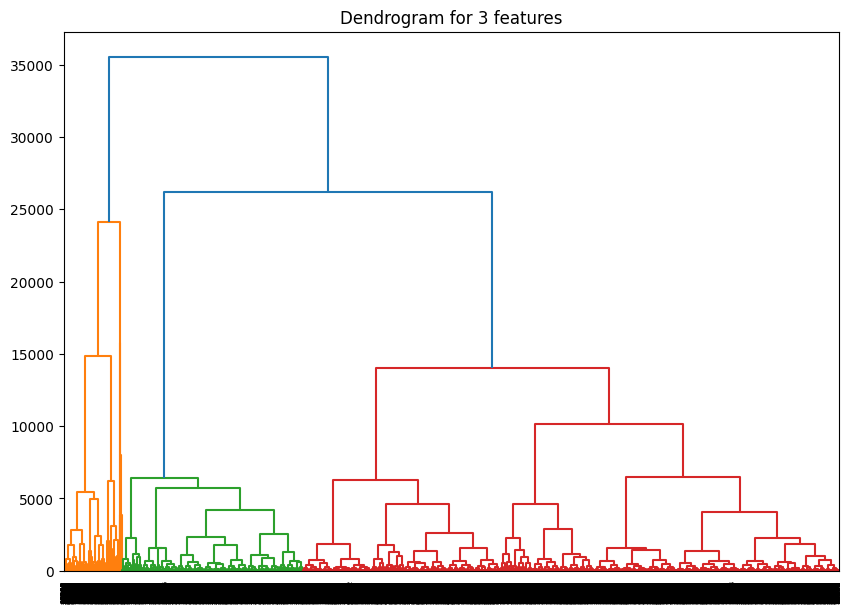

In [3]:
# Clustering CAH sur RFM
rfm_clusters_by_hand = perform_cah_clustering_by_hand(rfm_features)

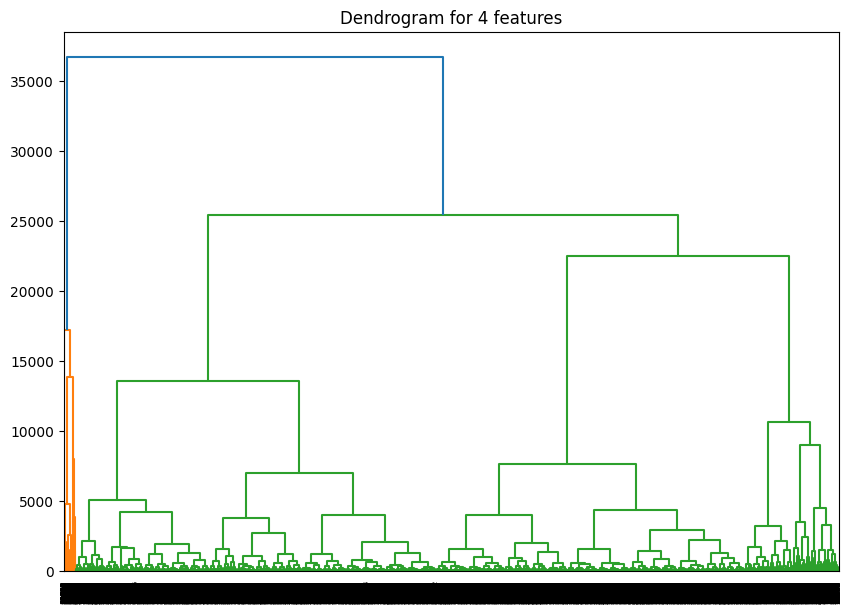

In [4]:
# Clustering CAH sur RFM+Review_Score
rfm_review_clusters_by_hand = perform_cah_clustering_by_hand(rfm_review_features)

In [6]:

# Ajouter les clusters aux données
sampled_data['RFM_Cluster_by_hand'] = rfm_clusters_by_hand
sampled_data['RFM_Review_Cluster_by_hand'] = rfm_review_clusters_by_hand

# Afficher les pourcentages d'individus dans chaque cluster pour RFM
rfm_cluster_percentages_by_hand = sampled_data['RFM_Cluster_by_hand'].value_counts(normalize=True) * 100
print(f'Pourcentage d\'individus dans chaque cluster RFM:\n{rfm_cluster_percentages_by_hand}')

# Afficher les pourcentages d'individus dans chaque cluster pour RFM+Review_Score
rfm_review_cluster_percentages_by_hand = sampled_data['RFM_Review_Cluster_by_hand'].value_counts(normalize=True) * 100
print(f'Pourcentage d\'individus dans chaque cluster RFM+Review_Score:\n{rfm_review_cluster_percentages_by_hand}')

Pourcentage d'individus dans chaque cluster RFM:
RFM_Cluster_by_hand
3    69.101732
2    23.322511
1     7.575758
Name: proportion, dtype: float64
Pourcentage d'individus dans chaque cluster RFM+Review_Score:
RFM_Review_Cluster_by_hand
3    51.923077
2    46.553447
1     1.523477
Name: proportion, dtype: float64


In [7]:
def perform_cah_clustering(data, num_clusters=3):
    # Effectuer la CAH
    clustering = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = clustering.fit_predict(data)
    
    return cluster_labels

In [8]:
# Clustering CAH sur RFM
rfm_clusters = perform_cah_clustering(rfm_features)

In [9]:
# Clustering CAH sur RFM+Review_Score
rfm_review_clusters = perform_cah_clustering(rfm_review_features)

Pourcentage d'individus dans chaque cluster RFM:
RFM_Cluster
1    69.101732
2    23.322511
0     7.575758
Name: proportion, dtype: float64
Pourcentage d'individus dans chaque cluster RFM+Review_Score:
RFM_Review_Cluster
0    51.923077
2    46.553447
1     1.523477
Name: proportion, dtype: float64


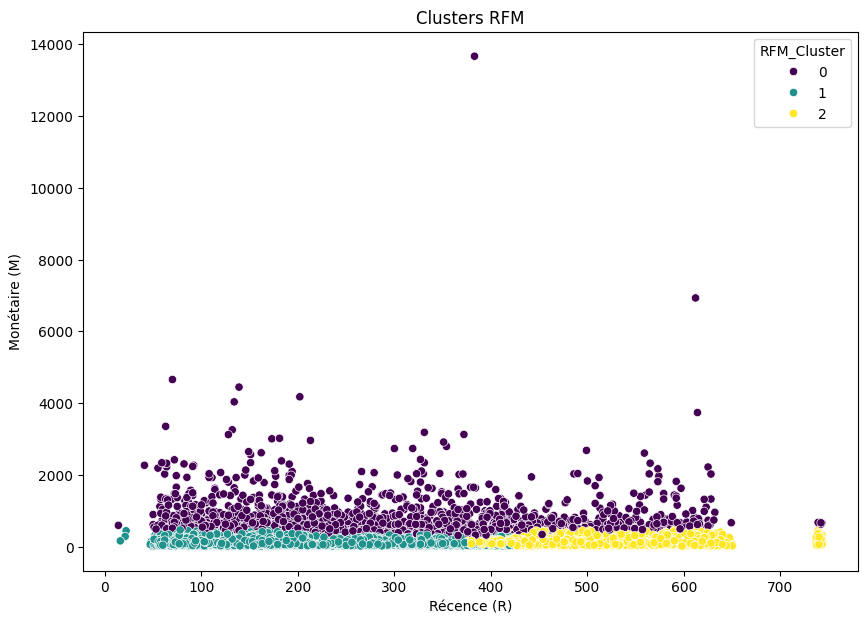

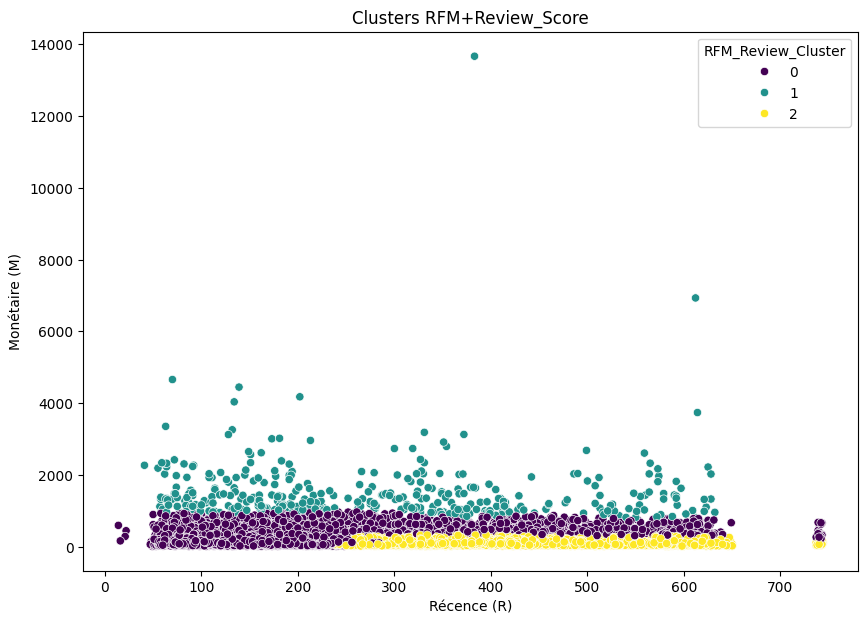

In [10]:
# Ajouter les clusters aux données
sampled_data['RFM_Cluster'] = rfm_clusters
sampled_data['RFM_Review_Cluster'] = rfm_review_clusters

# Afficher les pourcentages d'individus dans chaque cluster pour RFM
rfm_cluster_percentages = sampled_data['RFM_Cluster'].value_counts(normalize=True) * 100
print(f'Pourcentage d\'individus dans chaque cluster RFM:\n{rfm_cluster_percentages}')

# Afficher les pourcentages d'individus dans chaque cluster pour RFM+Review_Score
rfm_review_cluster_percentages = sampled_data['RFM_Review_Cluster'].value_counts(normalize=True) * 100
print(f'Pourcentage d\'individus dans chaque cluster RFM+Review_Score:\n{rfm_review_cluster_percentages}')

# Visualiser les clusters RFM
plt.figure(figsize=(10, 7))
sns.scatterplot(x='recency', y='monetary', hue='RFM_Cluster', data=sampled_data, palette='viridis')
plt.title('Clusters RFM')
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.show()

# Visualiser les clusters RFM+Review_Score
plt.figure(figsize=(10, 7))
sns.scatterplot(x='recency', y='monetary', hue='RFM_Review_Cluster', data=sampled_data, palette='viridis')
plt.title('Clusters RFM+Review_Score')
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.show()

## Comparaison CAH kmeans

Score ARI pour RFM: 0.4165630362036798
Score ARI pour RFM + Review Score: 0.5883090081406697


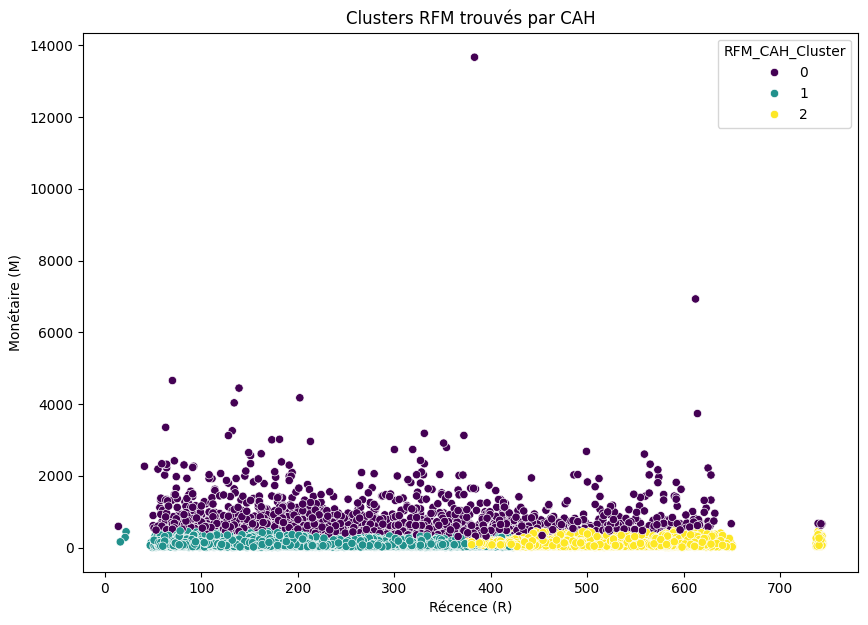

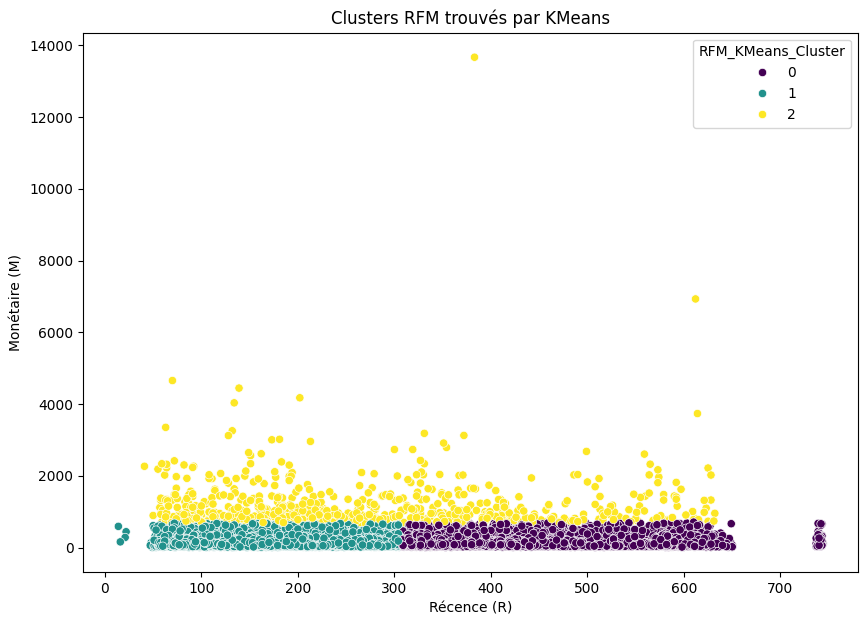

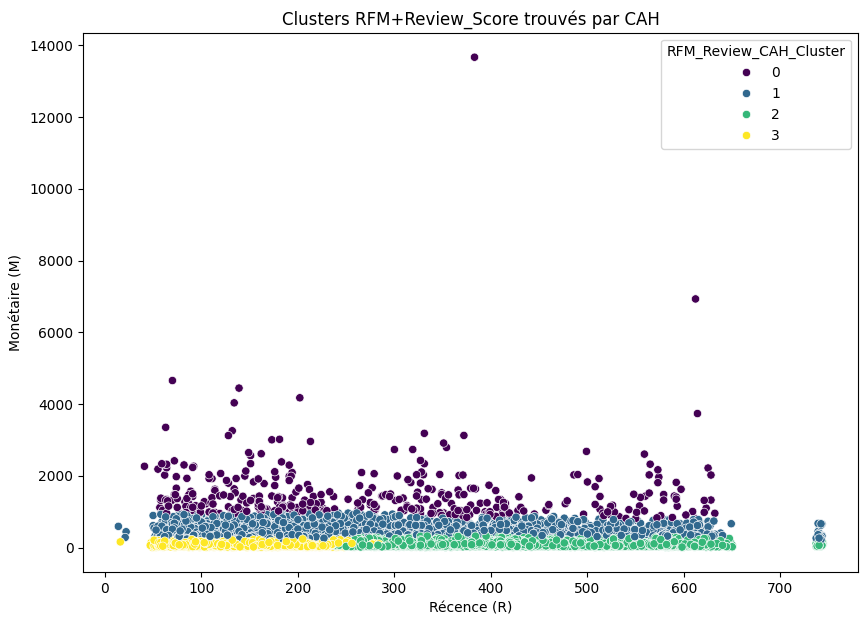

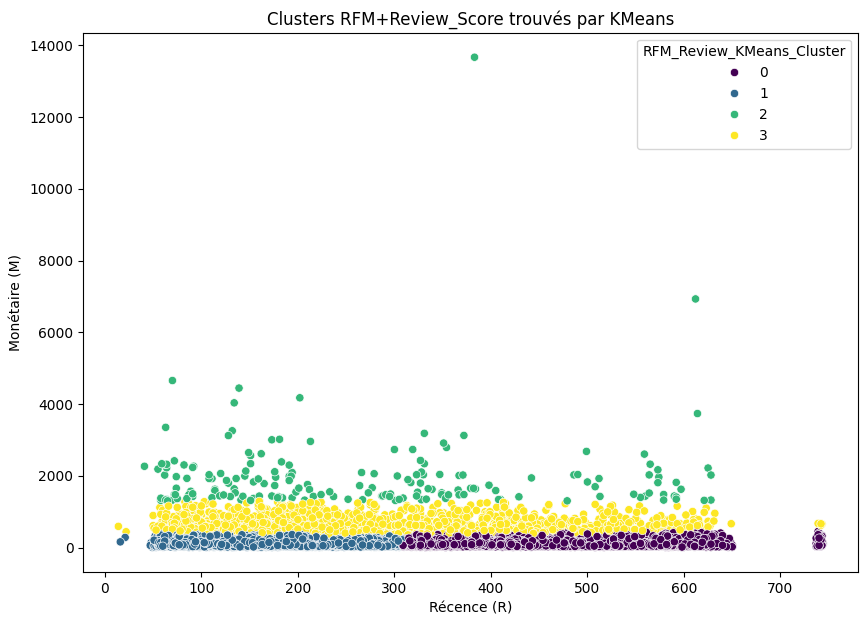

In [2]:
def perform_cah_clustering(data, num_clusters=3):
    # Perform CAH
    clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    cluster_labels = clustering.fit_predict(data)
    return cluster_labels

def perform_kmeans_clustering(data, num_clusters=3, random_state=42):
    # Perform KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(data)
    return cluster_labels

# CAH Clustering on RFM
rfm_cah_clusters = perform_cah_clustering(rfm_features)

# CAH Clustering on RFM+Review_Score
rfm_review_cah_clusters = perform_cah_clustering(rfm_review_features, num_clusters=4)

# KMeans Clustering on RFM
rfm_kmeans_clusters = perform_kmeans_clustering(rfm_features)

# KMeans Clustering on RFM+Review_Score
rfm_review_kmeans_clusters = perform_kmeans_clustering(rfm_review_features, num_clusters=4)

# Calculate ARI scores between the clusters found by CAH and those found by KMeans
ari_rfm = adjusted_rand_score(rfm_cah_clusters, rfm_kmeans_clusters)
ari_rfm_review = adjusted_rand_score(rfm_review_cah_clusters, rfm_review_kmeans_clusters)

# Add the clusters to the sampled data for visualization
sampled_data['RFM_CAH_Cluster'] = rfm_cah_clusters
sampled_data['RFM_KMeans_Cluster'] = rfm_kmeans_clusters
sampled_data['RFM_Review_CAH_Cluster'] = rfm_review_cah_clusters
sampled_data['RFM_Review_KMeans_Cluster'] = rfm_review_kmeans_clusters

# Display the ARI scores
print(f'Score ARI pour RFM: {ari_rfm}')
print(f'Score ARI pour RFM + Review Score: {ari_rfm_review}')

# Visualize the RFM clusters found by CAH and KMeans
plt.figure(figsize=(10, 7))
sns.scatterplot(x='recency', y='monetary', hue='RFM_CAH_Cluster', data=sampled_data, palette='viridis')
plt.title('Clusters RFM trouvés par CAH')
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(x='recency', y='monetary', hue='RFM_KMeans_Cluster', data=sampled_data, palette='viridis')
plt.title('Clusters RFM trouvés par KMeans')
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.show()

# Visualize the RFM+Review_Score clusters found by CAH and KMeans
plt.figure(figsize=(10, 7))
sns.scatterplot(x='recency', y='monetary', hue='RFM_Review_CAH_Cluster', data=sampled_data, palette='viridis')
plt.title('Clusters RFM+Review_Score trouvés par CAH')
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(x='recency', y='monetary', hue='RFM_Review_KMeans_Cluster', data=sampled_data, palette='viridis')
plt.title('Clusters RFM+Review_Score trouvés par KMeans')
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.show()